### Load Basic Libraries

In [1]:
# Import packages
import numpy as np
import pandas as pd

import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Change default style
sns.set_style('whitegrid')

#### Heart Disease Dataset
[heart disease dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In this challange we are going to apply Machine Learning analysus on the Hart Disease dataset.

The dataset is provided by four different sources:

- Hungarian Institute of Cardiology
- University Hospital, Zurich, Switzerland
- University Hospital, Basel, Switzerland
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation

##### Data Set Information

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

##### Attribute Information
Only 14 attributes used:
1. age: age in years
2. sex: sex (1=male; 0=female)
3. cp: chest pain type

    -- Value 1: typical angina    
    -- Value 2: atypical angina    
    -- Value 3: non-anginal pain    
    -- Value 4: asymptomatic
    
    
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results

    -- Value 0: normal    
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)    
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
    
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment

    -- Value 1: upsloping    
    -- Value 2: flat    
    -- Value 3: downsloping
   
   
12. ca: number of major vessels (0-3) coloured by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)

    -- Value 0: < 50% diameter narrowing    
    -- Value 1: > 50% diameter narrowing
    
    
(in any major vessel: attributes 59 through 68 are vessels)

### Reading the csv file and basic information

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.describe([.05, .95])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,39.100000,0.000000,0.000000,108.000000,175.000000,0.000000,0.000000,108.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
95%,68.000000,1.000000,3.000000,160.000000,326.900000,1.000000,1.000000,181.900000,1.000000,3.400000,2.000000,3.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Analyze the dataset in order to derive useful information

Measures of shape describe the distribution of the data within this dataset. These distributions show the spread (dispersion, variability, scatter) of the data. 

In [5]:
data.shape

(303, 14)

It shows that this dataset has 303 rows and 14 columns.

In [6]:
data.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

Renaming the column headers for better understanding of visualizations.

In [7]:
data.columns

Index(['Age', 'Sex', 'Chest_pain', 'Resting_blood_pressure', 'Cholesterol',
       'Fasting_blood_sugar', 'ECG_results', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_attack'],
      dtype='object')

We can see the names of columns here.

In [8]:
data.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statisctial Details Describe provides us with statistical in numerical format about the specific details of each of the columns. We can deduct that in AGE column the minimum age is 29 years and maximum is 77 years mean of age is 54 years. The quantities details are given in form of 25%, 50% and 75%. The data is divided into 3 quarties of 4 eaqul parts. Those statistical measures give us an idea  of the central tendency of the data set. However, mean is effected by outliers and hence we need more information to make accurate decisions. 

In [9]:
data.isnull().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

The dataset doesn't have missing information/ no null values. 

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain               303 non-null    int64  
 3   Resting_blood_pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_blood_sugar      303 non-null    int64  
 6   ECG_results              303 non-null    int64  
 7   Maximum_heart_rate       303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Major_vessels            303 non-null    int64  
 12  Thalassemia_types        303 non-null    int64  
 13  Heart_attack             303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [11]:
df = data.copy() # default dataset

In [12]:
df['Sex'].replace({1:'Male', 0:'Female'}, inplace=True)
df['Heart_attack'].replace({1:'Yes',0:'No'},inplace = True)


We can find the types of the field which we don't need to convert to. However, we can replace some of the colummns as these will make the understanding of visualizations better instead of numeric values.

### Finding the correlation among the attributes

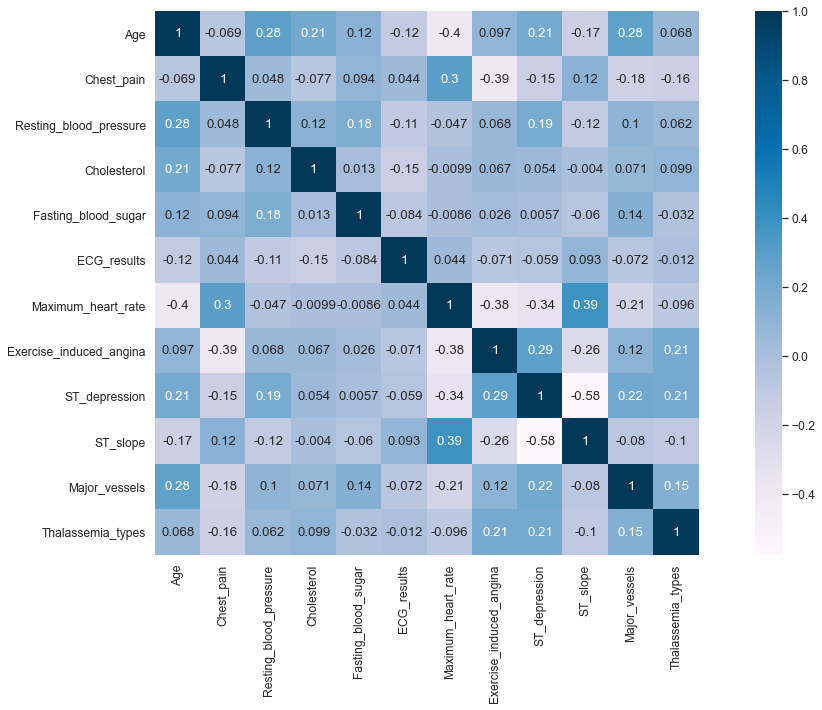

In [13]:
plt.figure(figsize=(20,10))
cm = df.corr()
sns.set(font_scale=1.1)
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            cmap='PuBu')
plt.show()

We see strong positive correlation between target and cp, thalach, slope and also negative correlation between target and sex, exang, ca, thai, oldpeak.

In [ ]:
# Plot
sns.pairplot(data=df)

In [ ]:
df.hist(figsize=(10,20), layout=(7,2))

In [ ]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(7,2), figsize=(10,20))
plt.show()

We have got a lot of outliers. 

In [ ]:
sns.catplot(data=df, x='Sex', y='Age', hue='Heart_attack', palette='magma', legend=True) # target presents having or not having heart diseases


The plot shows that the majority of the males have a heart diseas. 

Generally males having high cholesterol had higher cases of heart attacks than females at the same Cholesterol.

The cholesterol level of the males having a heart disease is higher than those without.

In [ ]:
df['Sex'].value_counts()

207 males and 96 females

In [ ]:
df['Heart_attack'].value_counts()

165 cases of heart diseases

In [ ]:
df['Thalassemia_types'].value_counts()

results of thallium stress test measuring blood flow to the heart

In [ ]:
sns.countplot(x='Sex', data=df, hue='Heart_attack', palette='PuBu')

Here 1 means male and 0 female. We observe that the males have more heart diseases than the females compared with the given dataset.

In [ ]:
 sns.countplot(x='Heart_attack', palette=sns.color_palette("GnBu", 3), data=df)  # target represents having or not having heart diseases

We observer that the count for not having heart disease and having heart disease are almost balanced - the amount not having disease is 140 and those having are 160.

In [ ]:
sort_by_heart_attack = df.groupby(['Sex','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_heart_attack.head(20).style.background_gradient(cmap='Blues')

This shows the total number of heart attacks that have occured for a particular age in case of males and females. In the top 20 count of heart attack, males have witnessed more heart attacks for their ages.

In [ ]:
sns.countplot(x='Major_vessels', hue='Heart_attack', data=df, palette='PuBu') # target presents having or not having heart diseases

###### ca: number of major vessels (0-3) coloured by flourosopy

In [ ]:
df['Major_vessels'].value_counts()

ca number of major vessels (0-3) coloured by flourosopy ca has a negative corelation with the target i.e. when ca will increase we witness a drop in heart disease and vice versa. 

In [ ]:
sns.countplot(x='Thalassemia_types', data=df, hue='Heart_attack', palette=sns.color_palette("GnBu",2))  # target represents having or not having heart diseases

thal 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
sns.countplot(x='Thalassemia_types', data=df, hue='Sex', palette=sns.color_palette("PuBu", 3))

In [ ]:
df['Chest_pain'].value_counts() # chest pain type

In [ ]:
sns.countplot(x='Chest_pain', hue='Heart_attack', data=df, palette='PuBu')  # target represents having or not having heart diseases

Shows chest pain with respet to heart disease/target

Let's find how many male and female have chest pain.

In [ ]:
sort_by_chest_pain = df.groupby(['Sex','Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_chest_pain.head(10).style.background_gradient(cmap='PuBu')

The Males having chest pain type 0 suffered the most heart attacks and type 2 the second highest. This trend is same for females.

In [ ]:
sns.barplot(x='Sex', y='Chest_pain', hue='Heart_attack', data=df, palette=sns.color_palette("GnBu", 2))  # target represents having or not having heart diseases

In [ ]:
sns.countplot(x='Chest_pain', hue='Sex', data=df, palette=sns.color_palette("GnBu", 3))

This shows chest pain count experienced by male and female.

In [ ]:
sns.boxplot(x='Sex', y='Cholesterol', data=df, hue='Heart_attack', palette=sns.color_palette("GnBu", 2)) # target presents having or not having heart diseases

In [ ]:
sns.barplot(data=df, x='Sex', y='Cholesterol', hue='Heart_attack', palette='PuBu') # target presents having or not having heart diseases

In [ ]:
sort_by_cholesterol = df.groupby(['Sex','Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_cholesterol.head(10).style.background_gradient(cmap='Blues')

We observe the outliers with the help of boxplot, outliers are values that are very small or large inthe given data set.

In [ ]:
sns.barplot(x='Sex', y='Thalassemia_types', data=df, hue='Heart_attack', palette='PuBu')  

In [ ]:
sort_by_thalassemia_types = df.groupby(['Sex','Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_thalassemia_types.head(10).style.background_gradient(cmap='Blues')

The higher the Thalassemia type, the higher were the cases of heart attack.

Here I have experimented with thal and observed with the number of major vessels 'ca' 

In [ ]:
sns.barplot(x='Heart_attack', y='Major_vessels', hue='Sex', data=df, palette=sns.color_palette("GnBu", 3))

In [ ]:
sns.barplot(x='Sex', y='ST_depression', data=df, hue='Heart_attack', palette='PuBu') 

In [ ]:
sort_by_st_depression = df.groupby(['Sex','ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_st_depression.head(10).style.background_gradient(cmap='Blues')

The lower the depression, the higher the cases were for heart attack.

###### oldpeak = ST depression induced by exercise relative to rest, measures of abnormality in electrocardiograms

In [ ]:
df['Fasting_blood_sugar'].value_counts()

###### fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [ ]:
sns.barplot(x='Fasting_blood_sugar', y='Cholesterol', data=df, hue='Heart_attack', palette=sns.color_palette("GnBu", 2))  # target represents having or not having heart diseases

In [ ]:
sns.barplot(x='Heart_attack', y='Fasting_blood_sugar', data=df, hue='Sex', palette=sns.color_palette("GnBu", 3))

In [ ]:
sort_by_fasting_blood_sugar = df.groupby(['Sex','Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
sort_by_fasting_blood_sugar.head(10).style.background_gradient(cmap='GnBu')

This shows relation of Fasting blood sugar with heart attack in case of Male and Females.

#### Cross tables

In [ ]:
tb_heart_disease = pd.crosstab(df['Sex'], df['Heart_attack'])
tb_heart_disease

In [ ]:
# tb_heart_disease.plot(kind='bar', stacked=True, color=['lightblue', 'teal'], grid=True)
tb_heart_disease.plot(kind='bar', stacked=True, color=sns.color_palette("GnBu", 3), grid=True)

Explanation: females not having heart diseases are 24, having heart diseases are 72 compared to males having heart disease are 114 and not having 93;

In [ ]:
tb_thal = pd.crosstab(index=df['Heart_attack'], columns=[df['Thalassemia_types']], margins=True)
tb_thal

Let's plot it. As you can see the chances males closer to the 130 are more likely to have a heart disease.

In [ ]:
tb_thal.plot(kind='bar', stacked=True, color=sns.color_palette("GnBu", 5))
plt.show()

In [ ]:
tb_chest_pain = pd.crosstab(df['Chest_pain'], df['Heart_attack'])
tb_chest_pain

In [ ]:
tb_chest_pain.plot(kind='bar', stacked=True, color=sns.color_palette("GnBu", 3), grid=True) # target represents having or not having heart diseases

### Bivariate Analysis

In [ ]:
# Change defaults
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('rainbow')

plt.figure(figsize=(20, 10)) # change the size of the plot
sns.countplot(x = 'Age',hue = 'Heart_attack', data = df)

The dependence of Heart Attack on Age.

In [ ]:
plt.figure(figsize=(20, 10)) # change the size of the plot
sns.countplot(x = 'Age',hue = 'Chest_pain', data = df)

The dependence of Chest pain on Age.

In [ ]:
plt.figure(figsize=(20, 10)) # change the size of the plot
sns.countplot(x = 'Age',hue = 'Fasting_blood_sugar', data = df)

The dependence of result of Fasting blood sugar on age.

In [ ]:
plt.figure(figsize=(20, 10)) # change the size of the plot
sns.countplot(x = 'Age',hue = 'ECG_results', data = df)

The dependence of result of ECG on age.

In [ ]:
plt.figure(figsize=(20, 10)) # change the size of the plot
sns.countplot(x = 'Age',hue = 'Exercise_induced_angina', data = df)

The dependence of result of Exercise Induced Angina on age.

In [ ]:
plt.figure(figsize=(20, 10)) # change the size of the plot
sns.countplot(x = 'Age',hue = 'ST_slope', data = df)

The dependence of result of ST Slope on age.

In [ ]:
plt.figure(figsize=(20, 10)) # change the size of the plot
sns.countplot(x = 'Age',hue = 'Major_vessels', data = df)

The dependence of result of Major vessels being blocked with age.

In [ ]:
plt.figure(figsize=(20, 10)) # change the size of the plot
sns.countplot(x = 'Age',hue = 'Thalassemia_types', data = df)

The dependence of result of Thalassemia on age.

In [ ]:
sns.set(font_scale=0.9) # change the font size for the next plots

sns.relplot(x ='Age', y ='Chest_pain', col = 'Sex', data = df, color="teal", height = 5)

Relationship between Chest Pain, Age and Sex.

In [ ]:
sns.relplot(x ='Age', y ='Resting_blood_pressure', col = 'Sex', data = df, color = 'grey')

In [ ]:
sns.relplot(x ='Age', y ='Cholesterol', col = 'Sex', data = df, color = 'turquoise')

Relationship between Cholesterol, Age and Sex.

In [ ]:
sns.relplot(x ='Age', y ='Fasting_blood_sugar', col = 'Sex', data = df, color = 'teal')

Relationship between Fasting Blood Sugar, Age and Sex.

In [ ]:
sns.relplot(x ='Age', y ='ECG_results', col = 'Sex', data = df, color = 'grey')

Relationship between ECG Results, Age and Sex.

In [ ]:
sns.relplot(x ='Age', y ='Maximum_heart_rate', col = 'Sex', data = df, color = 'turquoise')

Relationship between Maximum Heart Rate, Age and Sex.

In [ ]:
sns.jointplot(x =df['Age'], y =df['Exercise_induced_angina'], data = df, color = 'teal')

Relationship between Exercise Induced Angina and Age. The Age peaks at about 60 and Exercise Induced Angina problem is more at value 0.

In [ ]:
sns.relplot(x ='Age', y ='ST_depression', col = 'Sex', data = df, color = 'teal')

Relationship between ST_depression, Age and Sex.

In [ ]:
sns.relplot(x ='Age', y ='Major_vessels', col = 'Sex', data = df, color = 'grey')

Relationship between Major_vessels, Age and Sex.

In [ ]:
sns.relplot(x ='Age', y ='Thalassemia_types', col = 'Sex', data = df, color = 'turquoise')

Relationship between Thalassemia type, Age and Sex.

#### Summary

The overall graphical analysis shows that females tend to suffer less from heart disease and that men have a higher chances of getting struck by a heart disease. All men indepenitelly the age group are suffering from heart disease which isn't the case with women. 

Age is not such a huge critera for suffering from heart disease and parameters had very little relation amongst themselves. 

The research taken showed various results where the patterns showed that the heart disease conditions could have been diagonsed a bit earlier. 

### Apply Exploratory Data Analysis (EDA)

In [ ]:
# Libraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Libraries for various model parameter selection.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.metrics import accuracy_score,confusion_matrix
import scikitplot as skplt
from sklearn import metrics